In [1]:
#Importing dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [4]:
#Data collection
wine_data = pd.read_csv('winequality_red.csv')
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
#Printing the number of rows and columms in the dataset 
wine_data.shape

(1599, 12)

In [9]:
#Checking for null vlaues
wine_data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [11]:
#Data analysis and visualization

#Statistical measures of the dataset

wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [12]:
wine_data['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

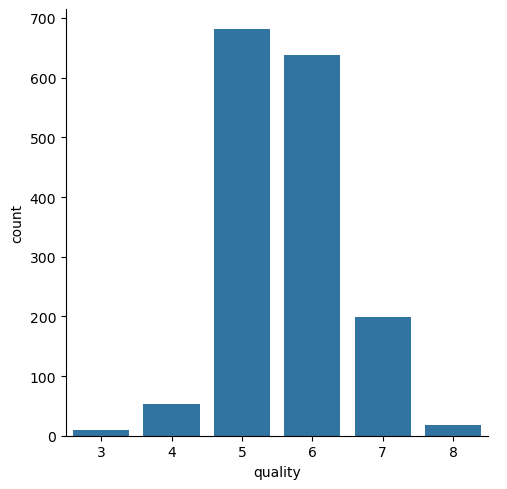

In [13]:
#Number of values for each quality

sns.catplot(x='quality', data=wine_data, kind= 'count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

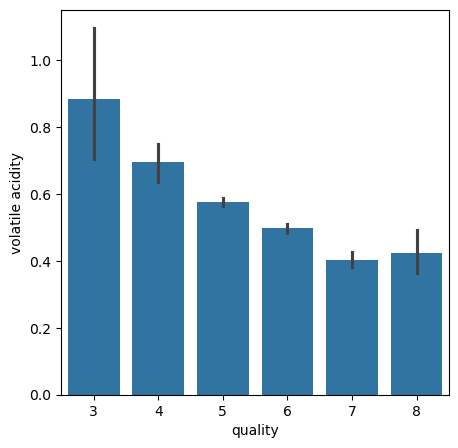

In [14]:
# volatile acidity vs quality

plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='volatile acidity', data= wine_data)


<Axes: xlabel='quality', ylabel='citric acid'>

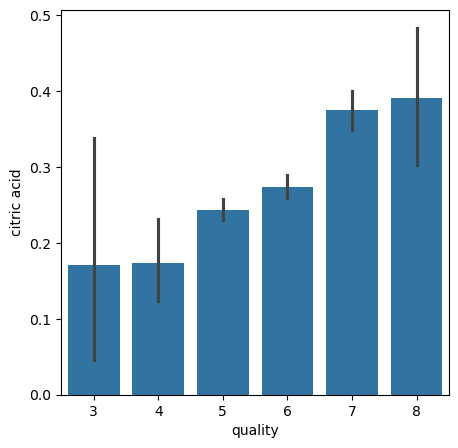

In [15]:
# citric acid vs quality

plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='citric acid', data= wine_data)


In [16]:
#Correlation between features and quality

# 1. Positive correlation
# 2. Negative correlation

correlation = wine_data.corr()

<Axes: >

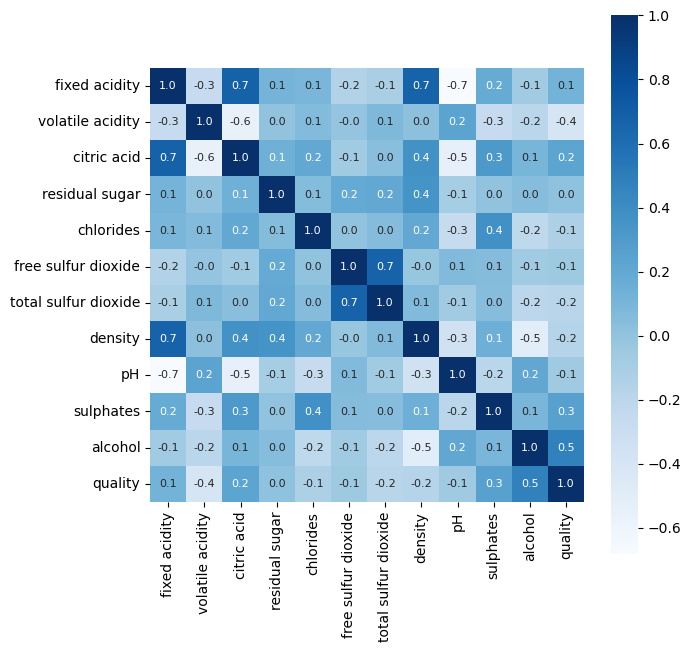

In [19]:
# Constructing a heatmap to understand correlation

plt.figure(figsize=(7,7))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [20]:
#Separate data and labels

X = wine_data.drop(columns='quality', axis=1)

In [22]:
# Binarization labels

Y = wine_data['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

In [24]:
Y.value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

In [25]:
#Split the training and testing data

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [30]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1279, 11)
(1279,)
(320, 11)
(320,)


In [32]:
# Model training

model = RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [35]:
# Model evaluation

#Accuracy on test data

x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)
print("Accuracy score of test data: ", test_data_accuracy)

Accuracy score of test data:  0.93125


In [46]:
#Building predictive system

input_data = (X.iloc[19])

#Changing the input data to a numpy array

input_data_as_numpy_array = np.asarray(input_data)

#Reshape the data

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

input_data_reshaped = pd.DataFrame(input_data_reshaped, columns=X.columns)

prediction = model.predict(input_data_reshaped)

print("Prediction : ", prediction)

if prediction:
    print("Good quality wine")
else:
    print("Bad quality wine!")

Prediction :  [0]
Bad quality wine!


In [45]:
# Change the input and varify
wine_data[wine_data['quality']==6] 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
19,7.9,0.320,0.51,1.8,0.341,17.0,56.0,0.99690,3.04,1.08,9.2,6
20,8.9,0.220,0.48,1.8,0.077,29.0,60.0,0.99680,3.39,0.53,9.4,6
24,6.9,0.400,0.14,2.4,0.085,21.0,40.0,0.99680,3.43,0.63,9.7,6
29,7.8,0.645,0.00,2.0,0.082,8.0,16.0,0.99640,3.38,0.59,9.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
